### Investigating Popular Data Science Questions on Stack Exchange

Stack Exchange has a dedicated website, [Data Science Stack Exchange (DSSE)](https://datascience.stackexchange.com/), where users can ask questions and have them answered by others. To ask a question, the user have to use an appropriate topic and tags to improve the odds of having the question answered. In this project, the aim to investigate questions that are mostly asked on Data Science using DSSE. 

#### Using the Data Science Exchange's Data Model

The [data explorer](https://data.stackexchange.com/datascience/query/edit/1369683) allows to write SQL queries to get insights into the types of questions that are being asked on the website. 

To this end, I explored several tables, notably tags and posts. Tags gave an idea of which topics are mostly searched about. A query of the top ten most used tags gave, machine-learning, python, neural-network, deep-learning, classification, keras, scikit-learn, tensor-flow, nlp, time-series. Querying the Posts table also gave tags similar to those above and many more.  

#### Getting the Data

Using the query below, I obtained the data that would be used for the analysis (stored as 2019_quetions.csv).

In [6]:
# SELECT Id, CreationDate,
#        Score, ViewCount, Tags,
#        AnswerCount, FavoriteCount
#   FROM posts
#  WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;

In [7]:
import pandas as pd
file = pd.read_csv('2019_questions.csv')

file.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [8]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null object
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


Most of the columns are not missing values except FavoriteCount which has over 80% of its value missing. The types of all the columns are appropriate as well except for the CreationDate column. And since the Tags column has multiple values, the best way to deal with it is to separate each entry into a list of tags.

In [9]:
file.fillna(0, inplace=True)

In [10]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null object
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [11]:
file['FavoriteCount'] = file['FavoriteCount'].astype('int')

In [12]:
import datetime as dt

def cnv(x):
    return dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
file['CreationDate'] = file['CreationDate'].apply(cnv)

In [13]:
file['Tags'] = file['Tags'].str.replace('><', ', ').str.replace('>', '').str.replace('<', '')

In [14]:
file['Tags'] = file['Tags'].str.split(',')

#### Most Used Tag and Most Viewed Post

Through counting the number of tags, the most used tag can be obtained. The ViewCount column will then subsequently be used to determine the most viewed post with that tag.

In [15]:
dict_tag = {}
def jnh(x):
    for i in range(0, len(x)):
        if x[i] in dict_tag:
            dict_tag[x[i]] = dict_tag[x[i]] + 1
        else:
            dict_tag[x[i]] = 1
    
    


file['Tags'].apply(jnh);

In [16]:
tag_count = pd.DataFrame.from_dict(dict_tag, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(10)

,Count
data-augmentation,23
one-hot-encoding,3
k-nn,4
hyperparameter-tuning,58
tableau,4
pruning,3
generative-models,2
fastai,6
torch,1
lstm,68


In [17]:
most_used = tag_count.sort_values(by="Count").tail(20)
most_used

,Count
nlp,230
regression,243
nlp,263
keras,278
pandas,294
time-series,301
classification,305
lstm,334
scikit-learn,372
classification,380


In [18]:
%matplotlib inline

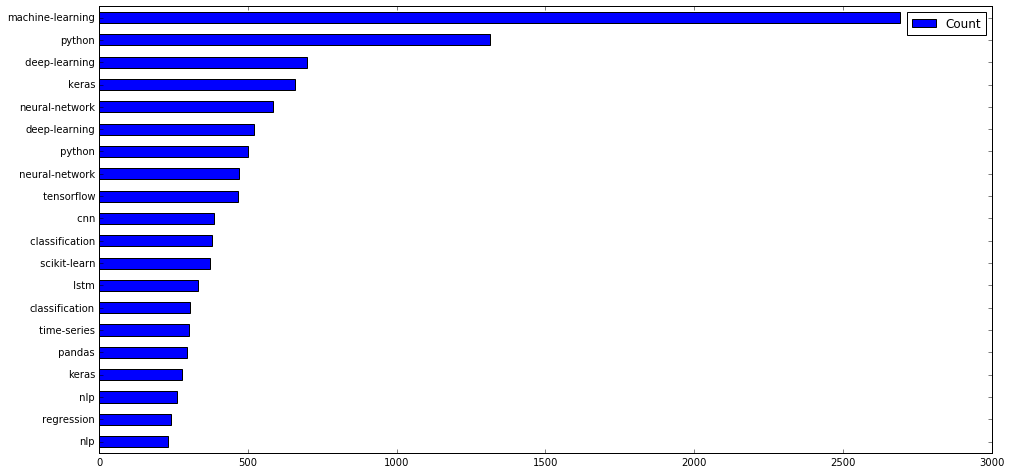

In [19]:
most_used.plot(kind="barh", figsize=(16,8))

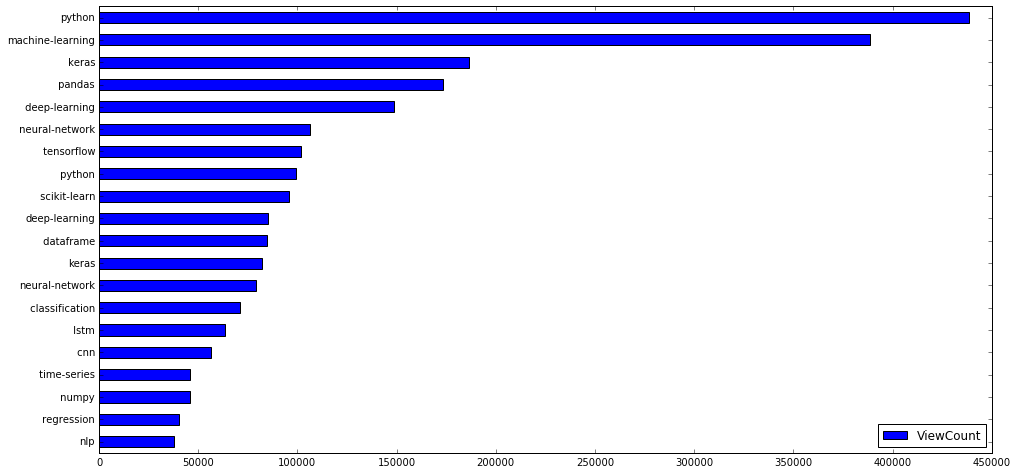

In [20]:
tag_view_count = dict()

for index, row in file.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)

most_viewed.plot(kind="barh", figsize=(16,8))

#### Investigating Relationship Between Tags

In [25]:
#tags in most_viewed but not in most_used

pd.merge(most_used, most_viewed, how="right", 
         left_index=True, right_index=True)

,Count,ViewCount
nlp,230.0,37670
regression,243.0,40478
numpy,NaN,45582
time-series,301.0,45588
cnn,386.0,56468
lstm,334.0,63636
classification,380.0,70946
neural-network,585.0,79238
keras,278.0,82042
dataframe,NaN,84505


In [27]:
#tags in most_used but not in most_viewed

pd.merge(most_used, most_viewed, how="left", 
        left_index=True, right_index=True)

,Count,ViewCount
nlp,230,37670.0
regression,243,40478.0
nlp,263,NaN
keras,278,82042.0
pandas,294,173182.0
time-series,301,45588.0
classification,305,NaN
lstm,334,63636.0
scikit-learn,372,95976.0
classification,380,70946.0


The tags present in most_viewed and not present in most_used are:
* numpy
* dataframe

And the tags present in most_used and not present in most_viewed are:
* nlp
* classification

#### Using Domain Knowledge

The top 10 tags for both DataFrame include; machine learning, python, keras, deep-learning, neural-network, cnn, tensorflow, scikit-learn.

All these tags are related to machine learning and building algorithms. There is also an interest in complex algorithms such as deep learning which became popular in recent years. R is defintely not as popular as Python given that all the tags have use in Python but not all can be used in R and again, R is not at all among the top 20 tags in both DataFrame.

Given this, I would propose that the focus should be on creating deep learning related content.